In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [2]:
X, y = make_moons(n_samples=1000, noise=0.01)
y

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,

In [3]:
X

array([[ 0.6505436 ,  0.74181085],
       [ 0.80308789, -0.50278399],
       [ 1.69465023, -0.21312882],
       ...,
       [-0.9873597 ,  0.11108096],
       [ 1.80355305, -0.09244226],
       [-0.07600326,  1.00352675]])

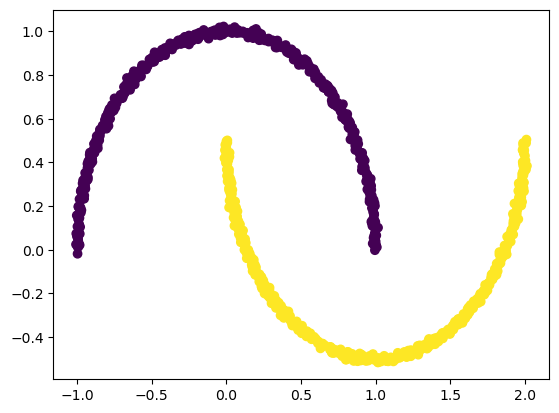

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
pca = PCA(n_components=1, random_state=123)
pca.fit(X)
pca_result = pca.transform(X)
pca_result

array([[-1.43893709e-02],
       [ 5.27562743e-01],
       [ 1.27997124e+00],
       [ 9.72335603e-01],
       [ 1.30278957e+00],
       [ 1.35899219e+00],
       [-1.48019302e-01],
       [ 4.31304782e-01],
       [ 6.02081804e-01],
       [ 3.22970164e-01],
       [-9.23454526e-01],
       [-1.27514238e+00],
       [ 7.83109242e-02],
       [-6.02922486e-01],
       [ 1.28124724e+00],
       [ 1.34233796e+00],
       [-1.15218286e-01],
       [-1.37149701e+00],
       [ 8.64122163e-01],
       [-3.41485142e-02],
       [-5.43653843e-01],
       [-1.81285414e-01],
       [-1.09654496e+00],
       [ 9.54080534e-01],
       [ 4.12465580e-01],
       [-2.24479800e-01],
       [-1.37759284e+00],
       [-6.74306697e-01],
       [ 3.41034000e-01],
       [-8.81923385e-02],
       [-4.12766131e-03],
       [ 1.36468344e+00],
       [ 1.02084338e+00],
       [-1.37957590e+00],
       [ 3.65930006e-01],
       [-3.77472147e-01],
       [-1.07822607e+00],
       [-1.39173224e-01],
       [-1.7

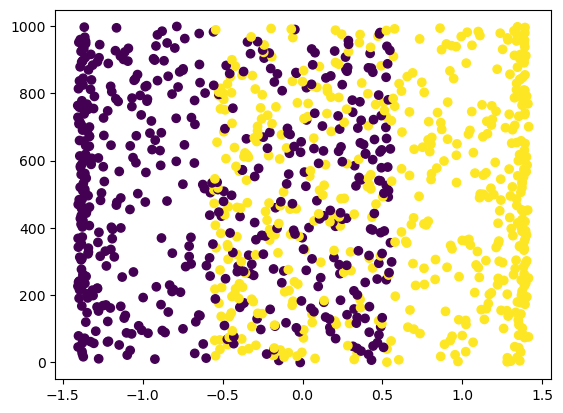

In [6]:
plt.scatter(pca_result[:, 0], range(0, 1000), c=y)

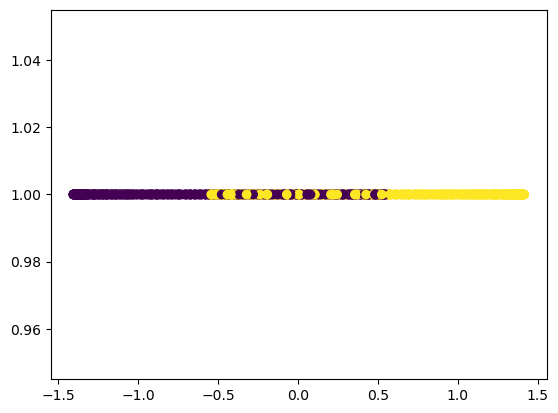

In [7]:
plt.scatter(pca_result[:, 0], [1 for _ in range(0, 1000)], c=y)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

1.0


In [11]:
rf = RandomForestClassifier(random_state=123)
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, random_state=123)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.776


In [13]:
kpca = KernelPCA(n_components=1, kernel='poly', gamma=10, random_state=123)
kpca.fit(X)
kpca_result = kpca.transform(X)
kpca_result

array([[-3.05337038e+01],
       [-2.45131740e+01],
       [ 1.16300190e+02],
       [ 2.87643193e+01],
       [ 1.26101677e+02],
       [ 2.19967964e+02],
       [-3.50057617e+01],
       [-9.04639684e+00],
       [-1.92490899e+01],
       [-3.39545012e+01],
       [-4.47745209e+01],
       [-5.13264268e+01],
       [-3.98522425e+01],
       [-4.36509764e+01],
       [ 1.13511463e+02],
       [ 1.58460600e+02],
       [-4.16212209e+01],
       [-6.92061002e+01],
       [ 9.76207435e+00],
       [-4.11376338e+01],
       [-4.26050073e+01],
       [-4.19254876e+01],
       [-4.61344544e+01],
       [ 2.38651871e+01],
       [-1.01891130e+01],
       [-3.74341583e+01],
       [-6.00159257e+01],
       [-4.40537554e+01],
       [-3.33492804e+01],
       [-4.15658706e+01],
       [-4.07735874e+01],
       [ 2.08132443e+02],
       [ 3.67016596e+01],
       [-6.28896257e+01],
       [-1.26326422e+01],
       [-4.23223051e+01],
       [-4.58507912e+01],
       [-4.18088961e+01],
       [-3.6

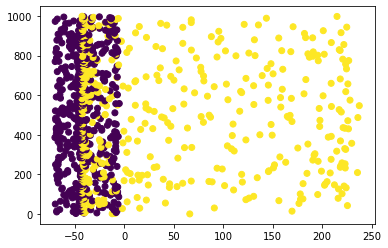

In [9]:
plt.scatter(kpca_result[:, 0], range(0, 1000), c=y)

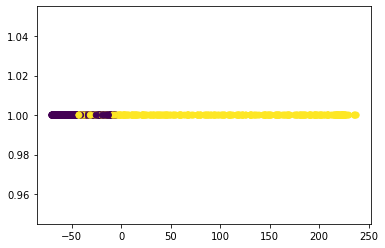

In [10]:
plt.scatter(kpca_result[:, 0], [1 for _ in range(0, 1000)], c=y)

In [14]:
rf = RandomForestClassifier(random_state=123)
X_train, X_test, y_train, y_test = train_test_split(kpca_result, y, random_state=123)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.816


In [ ]:
# MasoudKaviani.ir